# Homework 10: Clustering

# Aliza Rafique (ar05986)

### ar05986@st.habib.edu.pk

## Necessary Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
sns.set(rc={'figure.figsize':(17.7,17.27)})

In [3]:
df = pd.read_csv("McDonaldsMenu.csv")

In [4]:
df.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


## Question 1

In [5]:
X = df.drop(['Category', 'Item'], axis=1)
X

,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,260,87,...,31,10,4,17,3,17,10,0,25,15
1,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,25,8,...,30,10,4,17,3,18,6,0,25,8
2,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,45,15,...,29,10,4,17,2,14,8,0,25,10
3,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,285,95,...,30,10,4,17,2,21,15,0,30,15
4,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,50,16,...,30,10,4,17,2,21,6,0,25,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,10.1 oz (285 g),510,150,17.0,26,9.0,44,0.5,45,14,...,80,27,1,4,64,12,15,0,40,8
256,13.4 oz (381 g),690,200,23.0,35,12.0,58,1.0,55,19,...,106,35,1,5,85,15,20,0,50,10
257,6.7 oz (190 g),340,100,11.0,17,6.0,29,0.0,30,9,...,53,18,1,2,43,8,10,0,25,6
258,14.2 oz (403 g),810,290,32.0,50,15.0,76,1.0,60,20,...,114,38,2,9,103,21,20,0,60,6


## Question 2

In [6]:
# Cleaning serving size
X['Serving Size'] = X['Serving Size'].str.split(" ")
X['Serving Size'] = X['Serving Size'].str[0].astype('float')
X

,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,4.8,300,120,13.0,20,5.0,25,0.0,260,87,...,31,10,4,17,3,17,10,0,25,15
1,4.8,250,70,8.0,12,3.0,15,0.0,25,8,...,30,10,4,17,3,18,6,0,25,8
2,3.9,370,200,23.0,35,8.0,42,0.0,45,15,...,29,10,4,17,2,14,8,0,25,10
3,5.7,450,250,28.0,43,10.0,52,0.0,285,95,...,30,10,4,17,2,21,15,0,30,15
4,5.7,400,210,23.0,35,8.0,42,0.0,50,16,...,30,10,4,17,2,21,6,0,25,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,10.1,510,150,17.0,26,9.0,44,0.5,45,14,...,80,27,1,4,64,12,15,0,40,8
256,13.4,690,200,23.0,35,12.0,58,1.0,55,19,...,106,35,1,5,85,15,20,0,50,10
257,6.7,340,100,11.0,17,6.0,29,0.0,30,9,...,53,18,1,2,43,8,10,0,25,6
258,14.2,810,290,32.0,50,15.0,76,1.0,60,20,...,114,38,2,9,103,21,20,0,60,6


## Question 3: Normalizing the data

In [7]:
scaler = MinMaxScaler()
# transforming data
XS = scaler.fit_transform(X)
XS

array([[0.12258065, 0.15957447, 0.11320755, ..., 0.        , 0.35714286,
        0.375     ],
       [0.12258065, 0.13297872, 0.06603774, ..., 0.        , 0.35714286,
        0.2       ],
       [0.09354839, 0.19680851, 0.18867925, ..., 0.        , 0.35714286,
        0.25      ],
       ...,
       [0.18387097, 0.18085106, 0.09433962, ..., 0.        , 0.35714286,
        0.15      ],
       [0.42580645, 0.43085106, 0.27358491, ..., 0.        , 0.85714286,
        0.15      ],
       [0.19677419, 0.21808511, 0.14150943, ..., 0.        , 0.42857143,
        0.1       ]])

## Question 4: Generating WSS

#### Creating clusters

In [8]:
wss = []
sscore = []
for i in range(2, 25):
    kmeans = KMeans(n_clusters = i, max_iter = 300, random_state = 5)
    kmeans.fit(XS)
    wss.append(kmeans.inertia_)
    Y = kmeans.fit_predict(XS)
    sscore.append(silhouette_score(XS, Y))

#### Knee Plot

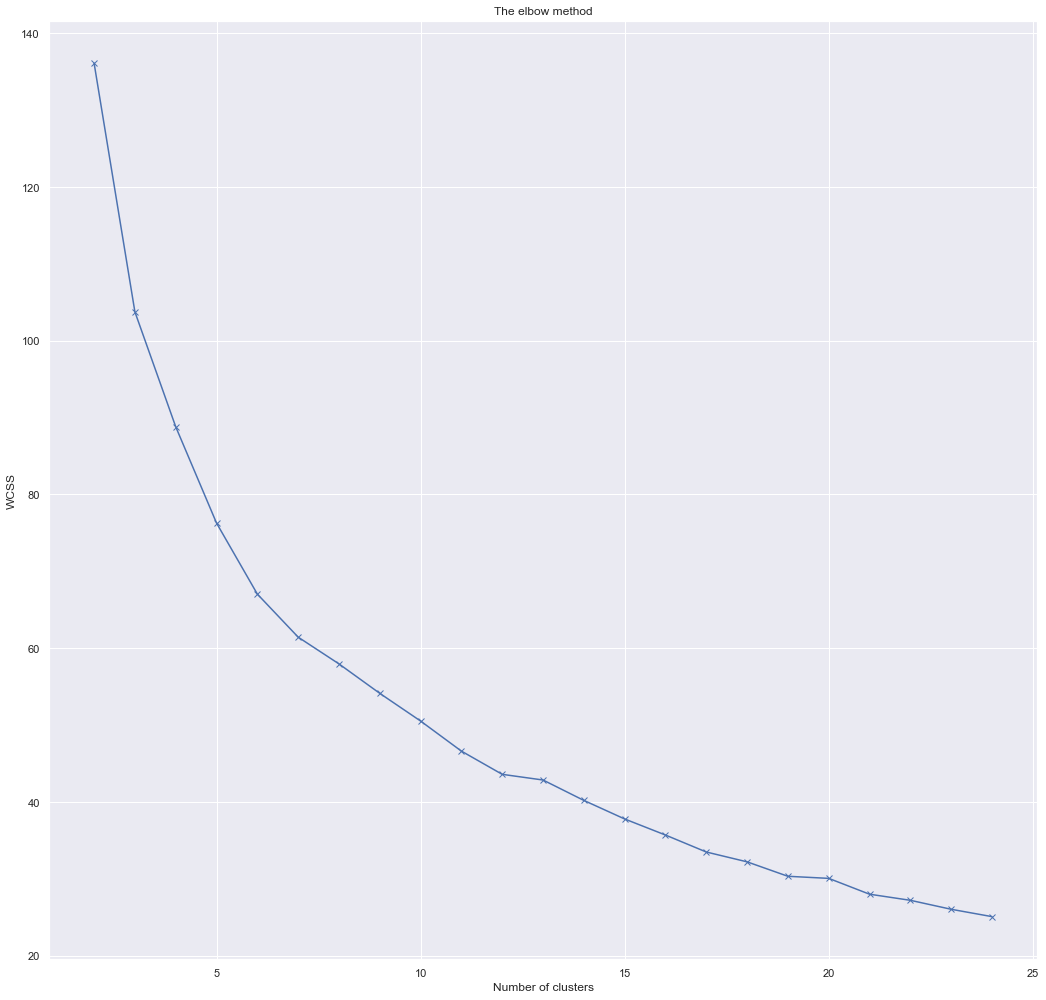

In [9]:
plt.plot(range(2, 25), wss, 'bx-')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

##### We can see curve getting smoother after the cluster value of 3. Let's look at the Silhouette Score plot below. 

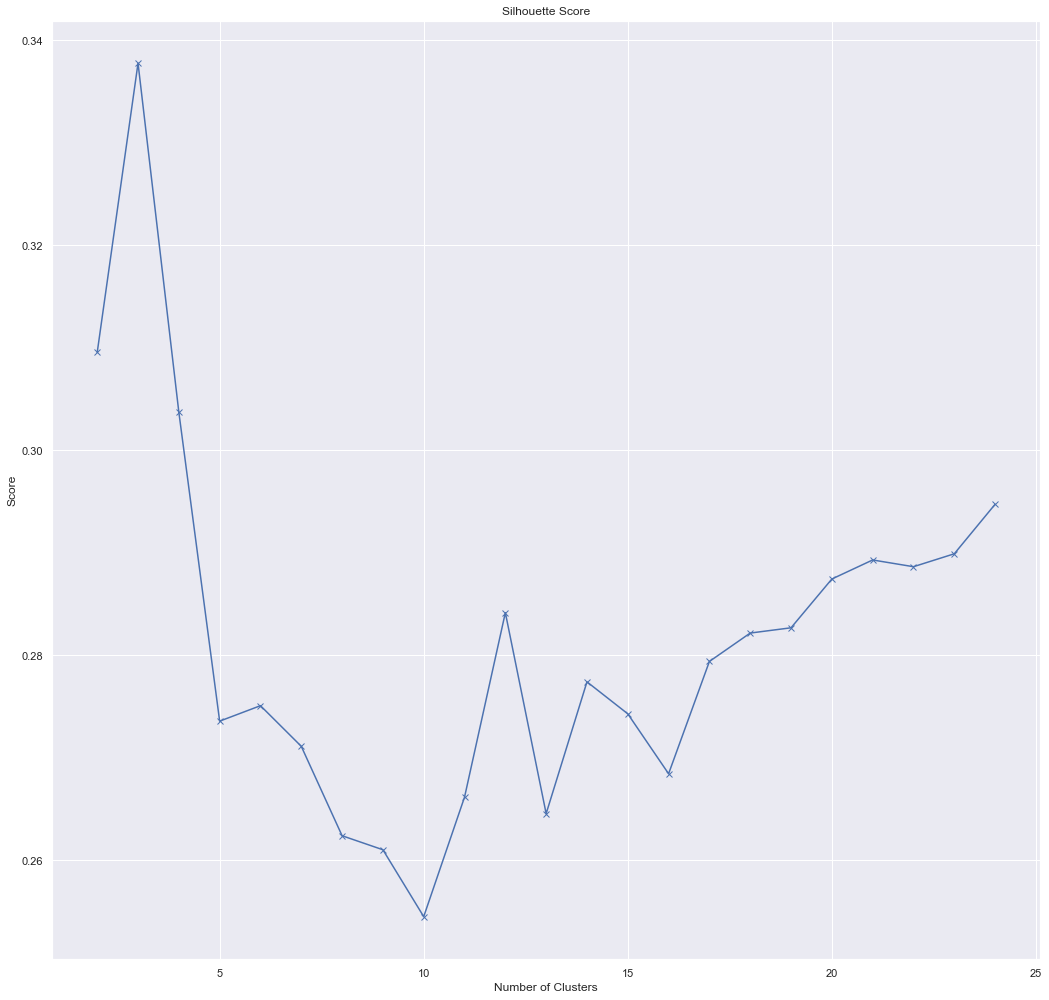

In [10]:
plt.plot(range(2, 25), sscore, 'bx-')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.show()

##### The highest value of Silhouette Score is at 3. Even though it is not a good score as it is not closer to 1 and means that clusters are not that apart from each other but it shows that still 3 is the optimal number of clusters.

## Question 5: Optimal number of cluster

#### K-Means

In [11]:
kmeans = KMeans(n_clusters = 3, max_iter = 300, random_state = 5)
Y = kmeans.fit_predict(XS)

In [12]:
Y

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0])

In [13]:
print(f'Silhouette Score(n=3): {silhouette_score(XS, Y)}')

Silhouette Score(n=3): 0.3377356344395697


##### The silhouette score is not good enough. It means that the clusters are not well apart from each other as the score is not closer to 1. 

## Question 6: Visualizing

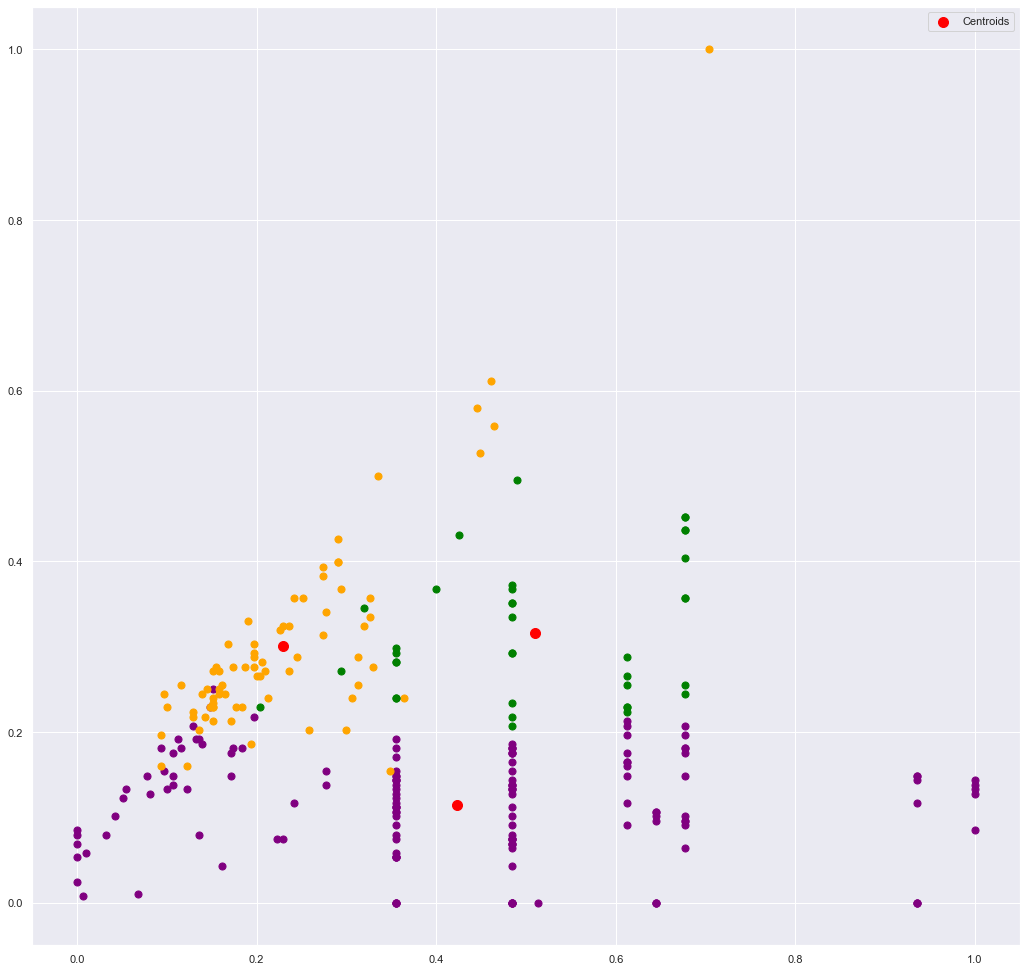

In [14]:
#Visualising the clusters
plt.scatter(XS[Y == 0, 0], XS[Y == 0, 1], s = 50, c = 'purple')
plt.scatter(XS[Y == 1, 0], XS[Y == 1, 1], s = 50, c = 'orange')
plt.scatter(XS[Y == 2, 0], XS[Y == 2, 1], s = 50, c = 'green')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

## Question 7: Cluster specific dataframes

In [15]:
C1 = X.iloc[Y == 0, :]
C2 = X.iloc[Y == 1, :]
C3 = X.iloc[Y == 2, :]

## Question 8: Insights

In [16]:
X.columns

Index(['Serving Size', 'Calories', 'Calories from Fat', 'Total Fat',
       'Total Fat (% Daily Value)', 'Saturated Fat',
       'Saturated Fat (% Daily Value)', 'Trans Fat', 'Cholesterol',
       'Cholesterol (% Daily Value)', 'Sodium', 'Sodium (% Daily Value)',
       'Carbohydrates', 'Carbohydrates (% Daily Value)', 'Dietary Fiber',
       'Dietary Fiber (% Daily Value)', 'Sugars', 'Protein',
       'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)',
       'Calcium (% Daily Value)', 'Iron (% Daily Value)'],
      dtype='object')

In [17]:
def sorting(C, means):
    X = list(C.columns)
    Y = means
    temp = []
    for i in range(len(X)):
        temp.append((Y[i], X[i]))
    temp = sorted(temp)
    X = []
    Y = []
    for i in temp:
        X.append(i[1])
        Y.append(i[0])
    X = X[::-1]
    Y = Y[::-1]
    return X, Y

In [18]:
# C1
means_c1 = []
for i in list(C1.columns):
    means_c1.append(C1[i].mean())

In [19]:
x1, y1 = sorting(C1, means_c1)

In [20]:
# C2
means_c2 = []
for i in list(C2.columns):
    means_c2.append(C2[i].mean())

In [21]:
x2, y2 = sorting(C2, means_c2)

In [22]:
# C3
means_c3 = []
for i in list(C3.columns):
    means_c3.append(C3[i].mean())

In [23]:
x3, y3 = sorting(C3, means_c3)

#### Following are the categories that I will be comparing:
##### 1. Protein
##### 2. Cholestrol
##### 3. Saturated Fat
##### 4. Calories
##### 5. Dietry Fibre
##### 6. Sodium
##### 7. Vitamin A (% Daily Value)
##### 8. Vitamin C (% Daily Value)
##### 9. Iron (% Daily Value)
##### 10. Calcium (% Daily Value)
##### 11. Trans Fat
##### 12. Sugars

In [24]:
contents = ['Calories', 'Saturated Fat', 'Cholesterol', 'Sodium', 'Carbohydrates', 'Dietary Fiber',
            'Protein', 'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)', 'Calcium (% Daily Value)', 'Iron (% Daily Value)', 'Trans Fat', 'Sugars']
x = ['Calories', 'Saturated Fat', 'Cholesterol', 'Sodium', 'Carbohydrates', 'Dietary Fiber',
            'Protein', 'Vit A(% Daily)', 'Vit C(% Daily)', 'Calcium(% Daily)', 'Iron(% Daily)', 'Trans Fat', 'Sugars']

In [31]:
# Plotting function
def plotting(X, Y, contents):
    y = []
    for i in contents:
        index = X.index(i)
        y.append(Y[index])
    ax = sns.barplot(x, y)
    ax.set(xlabel='Contents', ylabel='Mean')
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', 
                    xytext = (0, 9), textcoords = 'offset points')
    

C:\Users\Aliza Rafique\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


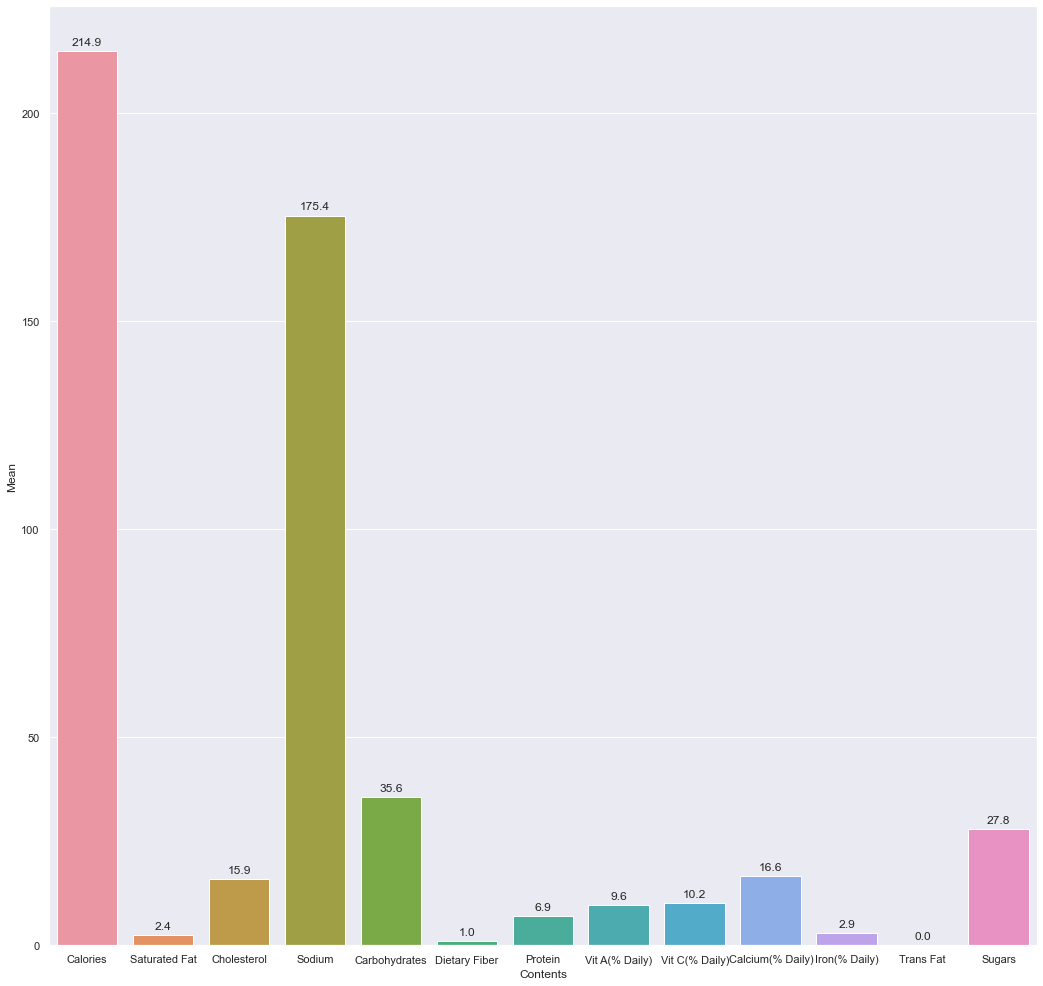

In [32]:
plotting(x1, y1, contents)

C:\Users\Aliza Rafique\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


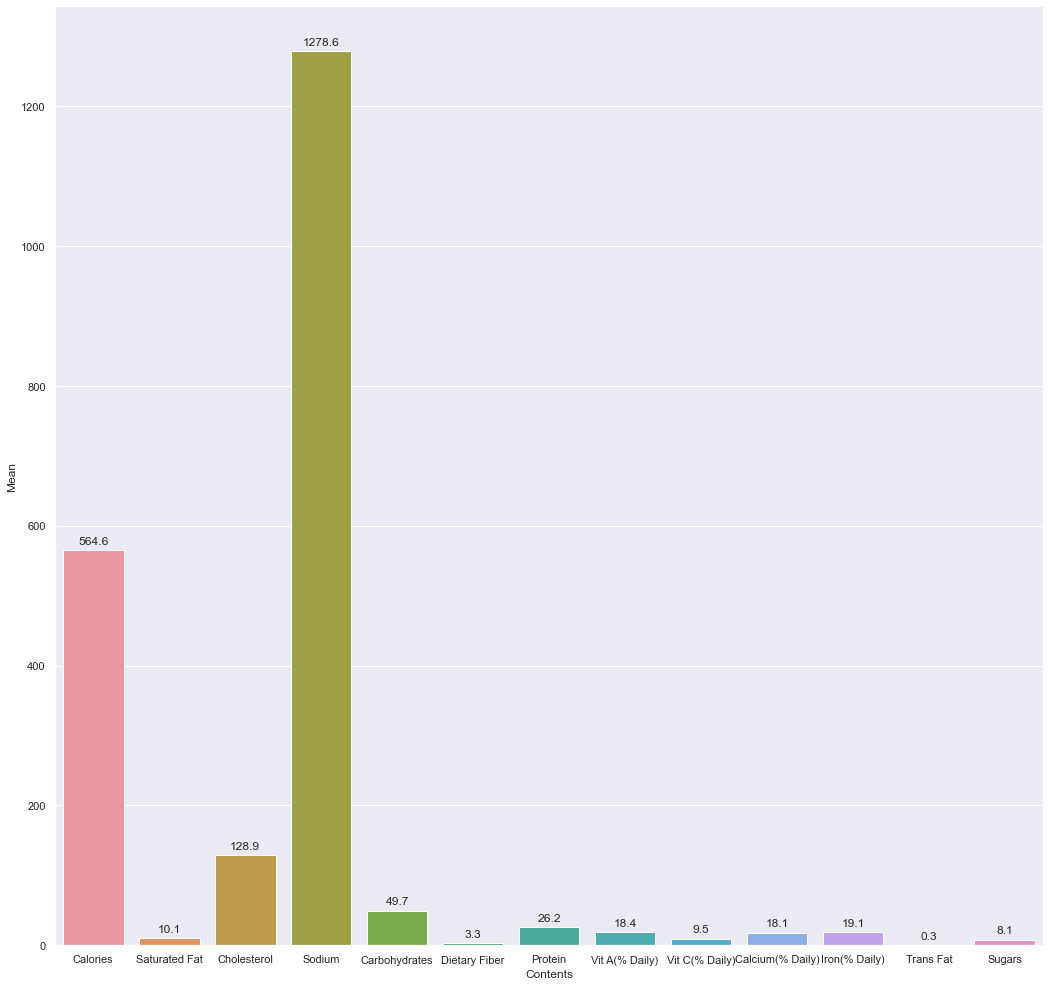

In [33]:
plotting(x2, y2, contents)

C:\Users\Aliza Rafique\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


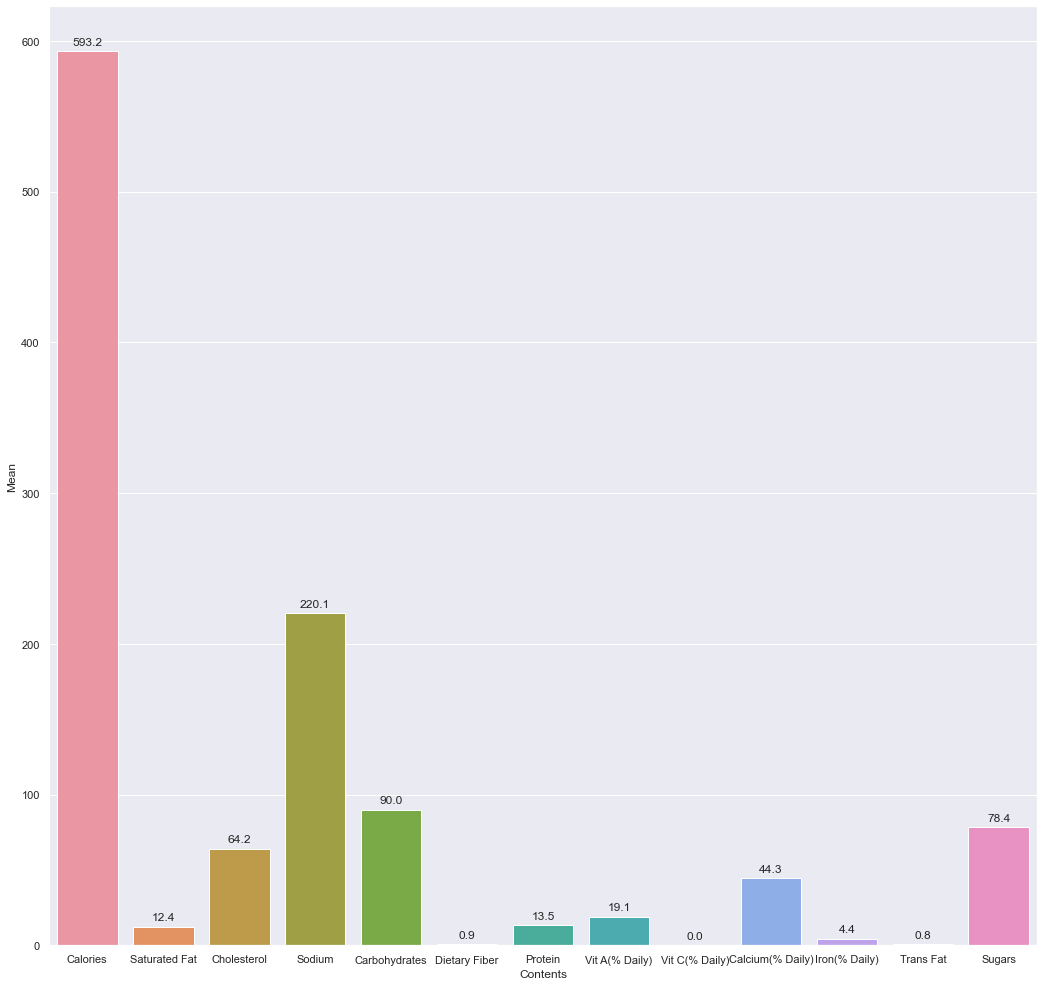

In [34]:
plotting(x3, y3, contents)

#### Insight 1:
In the graphs, we can see that the calorie content in C3 is almost the same as C2. Correspondingly, the mean values of quantities such as Carbohydrates, Saturated Fat, and Cholestrol are also much greater for C3 and C2 as compared to C1.


#### Insight 2
C2 has the highest mean Sodium value as compared to both of the clusters. It means that all the items that fall into this cluster are rich in sodium and they also have the lowest amount of sugars. 

#### Insight 3
C3 has 0% of Vitamin C - daily value. It means that some or none of the items in this cluster have vitamin C in them.  Whereas, the rest of the classes have higher and very close mean percentages of daily value to each other. 

#### Insight 4:
C1 has the lowest fat content for both Saturated Fats and Trans fat (which is basically 0.0).

## Question 9

### C1: Non-FATal
### C2: Health AsSALT
### C3: No C

# End Of Assignment